Basic Operations

Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result.

In [3]:
import numpy as np
a = np.array([20, 30, 40, 50])
b = np.arange(4)
c = a - b
print(c)
print(10 * np.sin(a))
print(a < 35)

[20 29 38 47]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
[ True  True False False]


In [4]:
import numpy as np
A = np.array([[1, 1],
              [0, 1]])
B = np.array([[2, 0],
              [3, 4]])
print(A*B)
print(A@B)
print(A.dot(B))

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


np.random.default_rng(1)使用给定的种子值（在这里是1）创建一个默认的随机数生成器，并将其赋值给变量rg。您可以使用这个随机数生成器来生成随机数。这个语句使用给定的种子值（在这里是1）创建一个默认的随机数生成器。

种子值用于初始化随机数生成器的内部状态。如果您使用相同的种子值创建多个随机数生成器，那么这些生成器将会生成相同的随机数序列。这在某些情况下是很有用的，例如在测试或调试代码时，您可能希望能够重现随机数序列。

例如，您可以使用rg.random()方法来生成一个在[0, 1)范围内的随机浮点数，或者使用rg.integers(low, high)方法来生成一个在[low, high)范围内的随机整数。


在您提供的代码片段中，数组a和数组c的值是不同的。

尽管两个数组都是使用相同种子值为1的随机数生成器rg1创建的，但是在创建数组c之前，您又使用随机数生成器rg1创建了一个数组a。这意味着，在创建数组c之前，随机数生成器rg1的内部状态已经被更新过了。

因此，当您再次使用随机数生成器rg1创建数组c时，它将会从更新后的内部状态开始生成随机数。这意味着，数组c中的元素将与数组a中的元素不同。

总之，即使您使用相同种子值的随机数生成器创建多个随机数组，这些数组的值也可能不同，具体取决于您调用随机数生成器方法的顺序。

In [5]:
import numpy as np

rg1 = np.random.default_rng(1)
a = np.floor(10 * rg1.random((3, 4)))

rg2 = np.random.default_rng(1)
b = np.floor(10 * rg2.random((4, 5)))

c = np.floor(10 * rg1.random((4, 5)))

rg3 = np.random.default_rng(1)
d=np.floor(10 * rg1.random((3, 4)))

# 可以观察到每次运行e的值都会改变，而由指定种子生成器的随机数组不会变
e=np.floor(10 * np.random.rand(3,4))

print(a)
print(b)
print(c)
print(d)
print(e)

[[5. 9. 1. 9.]
 [3. 4. 8. 4.]
 [5. 0. 7. 5.]]
[[5. 9. 1. 9. 3.]
 [4. 8. 4. 5. 0.]
 [7. 5. 3. 7. 3.]
 [4. 1. 4. 2. 2.]]
[[3. 7. 3. 4. 1.]
 [4. 2. 2. 7. 2.]
 [4. 9. 9. 7. 5.]
 [2. 1. 9. 5. 1.]]
[[6. 7. 6. 9.]
 [0. 5. 4. 0.]
 [6. 8. 5. 2.]]
[[2. 5. 2. 1.]
 [2. 4. 6. 3.]
 [3. 8. 7. 9.]]


In [6]:
rg=np.random.default_rng(1)  # create instance of default random number generator
a=np.ones((2,3),dtype=int)
b = rg.random((2, 3))
b += a
b
# a += b  is wrong  # b is not automatically converted to integer type

array([[1.51182162, 1.9504637 , 1.14415961],
       [1.94864945, 1.31183145, 1.42332645]])

When operating with arrays of different types, the type of the resulting array corresponds to the more general or precise one (a behavior known as upcasting).

In [7]:

a = np.ones(3, dtype=np.int32)
b = np.linspace(0, np.pi, 3)
print(b.dtype.name)
c = a + b
print(c)
d = np.exp(c * 1j)
print(d)
print(d.dtype)

float64
[1.         2.57079633 4.14159265]
[ 0.54030231+0.84147098j -0.84147098+0.54030231j -0.54030231-0.84147098j]
complex128


In [8]:
a = rg.random((2, 3))
print(a)
print(a.sum)
print(a.max)
print(a.min)


[[0.82770259 0.40919914 0.54959369]
 [0.02755911 0.75351311 0.53814331]]
<built-in method sum of numpy.ndarray object at 0x000001EEE9953C30>
<built-in method max of numpy.ndarray object at 0x000001EEE9953C30>
<built-in method min of numpy.ndarray object at 0x000001EEE9953C30>


In [9]:
a = np.arange(12).reshape(3, 4)
print(a)
print(a.sum(axis=0))
print(a.max(axis=1))
print(a.cumsum(axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[12 15 18 21]
[ 3  7 11]
[[ 0  1  3  6]
 [ 4  9 15 22]
 [ 8 17 27 38]]


# Universal Functions

In [10]:
B = np.arange(3)
print(np.exp(B))
print(np.sqrt(B))


[1.         2.71828183 7.3890561 ]
[0.         1.         1.41421356]


当您使用np.fromfunction函数创建数组时，您不需要手动为函数f传递参数。np.fromfunction函数会自动为函数f传递一组参数，这些参数是根据给定的形状和数组中每个元素的索引计算得到的。

In [11]:
def f(x, y):
    return 10 * x + y
b = np.fromfunction(f, (5, 4), dtype=int)
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [12]:
a = np.floor(10 * rg.random((3, 4)))
print(a)
print(a.ravel()) # returns the array, flattened

[[3. 7. 3. 4.]
 [1. 4. 2. 2.]
 [7. 2. 4. 9.]]
[3. 7. 3. 4. 1. 4. 2. 2. 7. 2. 4. 9.]


If a dimension is given as -1 in a reshaping operation, the other dimensions are automatically calculated:

In [13]:
a.reshape(4, -1)

array([[3., 7., 3.],
       [4., 1., 4.],
       [2., 2., 7.],
       [2., 4., 9.]])

# Stacking together different arrays

In [14]:
a = np.floor(10 * rg.random((2, 2)))
b = np.floor(10 * rg.random((2, 2)))
print(a)
print(b)
print(np.vstack((a, b)))
print(np.hstack((a, b)))

[[9. 7.]
 [5. 2.]]
[[1. 9.]
 [5. 1.]]
[[9. 7.]
 [5. 2.]
 [1. 9.]
 [5. 1.]]
[[9. 7. 1. 9.]
 [5. 2. 5. 1.]]


The function column_stack stacks 1D arrays as columns into a 2D array. It is equivalent to hstack only for 2D arrays:

In [15]:
from numpy import newaxis
print(np.column_stack((a, b)))  # with 2D arrays
a = np.array([4., 2., 3.])
b = np.array([3., 8., .2])
print(np.column_stack((a, b)))  # returns a 2D array
print(np.hstack((a, b)))         # the result is different
print(a[:, newaxis])  # view `a` as a 3D column vector
print(np.column_stack((a[:, newaxis], b[:, newaxis])))
print(np.hstack((a[:, newaxis], b[:, newaxis]))) #  the result is the same

[[9. 7. 1. 9.]
 [5. 2. 5. 1.]]
[[4.  3. ]
 [2.  8. ]
 [3.  0.2]]
[4.  2.  3.  3.  8.  0.2]
[[4.]
 [2.]
 [3.]]
[[4.  3. ]
 [2.  8. ]
 [3.  0.2]]
[[4.  3. ]
 [2.  8. ]
 [3.  0.2]]


On the other hand, the function row_stack is equivalent to vstack for any input arrays. In fact, row_stack is an alias for vstack:

# Splitting one array into several smaller ones

In [16]:
a = np.floor(10 * rg.random((2, 12)))
print(a)
print(np.hsplit(a, 3))
print(np.hsplit(a, (3, 4)))

[[6. 7. 6. 9. 0. 5. 4. 0. 6. 8. 5. 2.]
 [8. 5. 5. 7. 1. 8. 6. 7. 1. 8. 1. 0.]]
[array([[6., 7., 6., 9.],
       [8., 5., 5., 7.]]), array([[0., 5., 4., 0.],
       [1., 8., 6., 7.]]), array([[6., 8., 5., 2.],
       [1., 8., 1., 0.]])]
[array([[6., 7., 6.],
       [8., 5., 5.]]), array([[9.],
       [7.]]), array([[0., 5., 4., 0., 6., 8., 5., 2.],
       [1., 8., 6., 7., 1., 8., 1., 0.]])]


# Copies and Views

No Copy at All

Simple assignments make no copy of objects or their data.

In [17]:
a = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]])
b = a            # no new object is created
b is a           # a and b are two names for the same ndarray object

True

Python passes mutable objects as references, so function calls make no copy.

In [18]:
def f(x):
    print(id(x))
print(id(a))  # id is a unique identifier of an object 
f(a)

2125632802416
2125632802416


View or Shallow Copy

Different array objects can share the same data. The view method creates a new array object that looks at the same data.

In [19]:
c = a.view()
print(c is a)
print(c.base is a)   # c is a view of the data owned by a
print(c.flags.owndata)
print(a.flags.owndata)
c = c.reshape((2, 6))  # a's shape doesn't change
c[0, 4] = 1234         # a's data changes
print(a)

False
True
False
True
[[   0    1    2    3]
 [1234    5    6    7]
 [   8    9   10   11]]


Slicing an array returns a view of it:

In [20]:
s = a[:, 1:3]
s[:] = 10  # s[:] is a view of s. Note the difference between s = 10 and s[:] = 10
print(a)

[[   0   10   10    3]
 [1234   10   10    7]
 [   8   10   10   11]]


Deep Copy

The copy method makes a complete copy of the array and its data.

In [21]:
d = a.copy()  # a new array object with new data is created
print(d is a)
print(d.base is a) # d doesn't share anything with a
d[0, 0] = 9999
print(a)

False
False
[[   0   10   10    3]
 [1234   10   10    7]
 [   8   10   10   11]]


In [22]:
a = np.arange(int(1e8)) # 100 000 000
# b = a[:100].copy()
b = a[:100]
del a  # the memory of ``a`` can be released.
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


If b = a[:100] is used instead, a is referenced by b and will persist in memory even if del a is executed.

# Functions and Methods Overview

Broadcasting rules

Broadcasting allows universal functions to deal in a meaningful way with inputs that do not have exactly the same shape.

The first rule of broadcasting is that if all input arrays do not have the same number of dimensions, a “1” will be repeatedly prepended to the shapes of the smaller arrays until all the arrays have the same number of dimensions.

The second rule of broadcasting ensures that arrays with a size of 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is assumed to be the same along that dimension for the “broadcast” array.

After application of the broadcasting rules, the sizes of all arrays must match. More details can be found in Broadcasting.

# Advanced indexing and index tricks

NumPy offers more indexing facilities than regular Python sequences. In addition to indexing by integers and slices, as we saw before, arrays can be indexed by arrays of integers and arrays of booleans.


Indexing with Arrays of Indices

In [23]:
a = np.arange(12)**2  # the first 12 square numbers
i = np.array([1, 1, 3, 8, 5])  # an array of indices
print(a[i]) # the same shape as `i`
j = np.array([[3, 4], [9, 7]])  # a bidimensional array of indices
print(a[j]) # the same shape as `j`

[ 1  1  9 64 25]
[[ 9 16]
 [81 49]]


When the indexed array a is multidimensional, a single array of indices refers to the first dimension of a. The following example shows this behavior by converting an image of labels into a color image using a palette.

In [24]:
palette = np.array([[0, 0, 0],         # black
                    [255, 0, 0],       # red
                    [0, 255, 0],       # green
                    [0, 0, 255],       # blue
                    [255, 255, 255]])  # white
image = np.array([[0, 1, 2, 0],  # each value corresponds to a color in the palette
                  [0, 3, 4, 0]])
print(palette[image])  # the (2, 4, 3) color image   # the same shape as `image`

[[[  0   0   0]
  [255   0   0]
  [  0 255   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0 255]
  [255 255 255]
  [  0   0   0]]]


We can also give indexes for more than one dimension. The arrays of indices for each dimension must have the same shape.

In [25]:
a = np.arange(12).reshape(3, 4)
print(a)
i = np.array([[0, 1],  # indices for the first dim of `a`
              [1, 2]])
j = np.array([[2, 1],  # indices for the second dim
              [3, 3]])
print(a[i, j]) # i and j must have equal shape
print(a[i, 2])
print(a[:, j])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 2  5]
 [ 7 11]]
[[ 2  6]
 [ 6 10]]
[[[ 2  1]
  [ 3  3]]

 [[ 6  5]
  [ 7  7]]

 [[10  9]
  [11 11]]]


In Python, arr[i, j] is exactly the same as arr[(i, j)]—so we can put i and j in a tuple and then do the indexing with that.

However, we can not do this by putting i and j into an array, because this array will be interpreted as indexing the first dimension of a.

In [26]:
l=(i,j)
print(a[l])

[[ 2  5]
 [ 7 11]]


Another common use of indexing with arrays is the search of the maximum value of time-dependent series:

如果 data 是一个二维数组，那么 data.shape[0] 就是它的行数，而 data.shape[1] 就是它的列数。

In [27]:
time = np.linspace(20, 145, 5)  # time scale
data = np.sin(np.arange(20)).reshape(5, 4)  # 4 time-dependent series
print(time)
print(data)
# index of the maxima for each series
ind = data.argmax(axis=0)
print(ind)
# times corresponding to the maxima
time_max = time[ind]
data_max = data[ind, range(data.shape[1])]  # => data[ind[0], 0], data[ind[1], 1]...
print(time_max)
print(data_max)
print(np.all(data_max==data.max(axis=0)))

[ 20.    51.25  82.5  113.75 145.  ]
[[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]
 [-0.53657292  0.42016704  0.99060736  0.65028784]
 [-0.28790332 -0.96139749 -0.75098725  0.14987721]]
[2 0 3 1]
[ 82.5   20.   113.75  51.25]
[0.98935825 0.84147098 0.99060736 0.6569866 ]
True


# Indexing with Boolean Arrays

In [28]:
a=np.arange(12).reshape(3,4)
b=a>4
print(b)
print(a[b])

[[False False False False]
 [False  True  True  True]
 [ True  True  True  True]]
[ 5  6  7  8  9 10 11]


In [29]:
a[b]=0
print(a)

[[0 1 2 3]
 [4 0 0 0]
 [0 0 0 0]]


我们使用np.meshgrid函数从一维数组x = [0, 1, 2]和y = [0, 1]生成了两个二维数组X和Y。这两个数组表示了一个二维网格，其中每个点的坐标由X和Y中对应位置的元素组成。具体来说，我们可以将这个二维网格表示为：

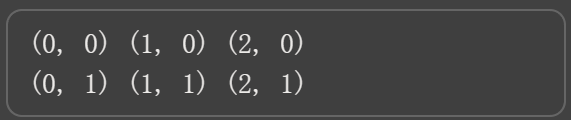

在这个网格中，每个点都是由输入数组x和y中的元素组成的坐标对。例如，点(0, 0)是由x[0] = 0和y[0] = 0组成的坐标对，而点(2, 1)是由x[2] = 2和y[1] = 1组成的坐标对。

X，Y：
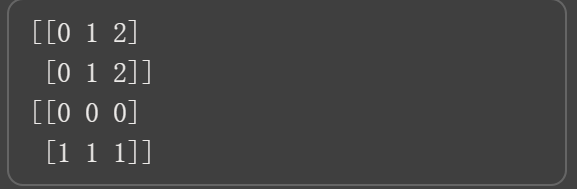

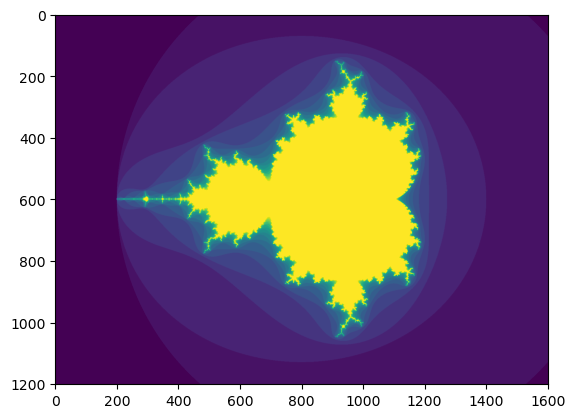

In [33]:
import matplotlib.pyplot as plt

def mandelbrot(h, w, maxit=20, r=2):
    """
    返回一个大小为(h,w)的Mandelbrot分形图像
    """
    # 在x轴上生成4h+1个点，在[-2.5,1.5]范围内均匀分布
    x = np.linspace(-2.5, 1.5, 4*h+1)
    # 在y轴上生成3w+1个点，在[-1.5,1.5]范围内均匀分布
    y = np.linspace(-1.5, 1.5, 3*w+1) 
    # 生成复平面上所有点的坐标矩阵，存储在C中
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    # 初始化z数组0，与C的形状相同,用来记录每个点的状态
    z = np.zeros_like(C)
    # 初始化divtime数组，所有元素都为maxit
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):# 最大迭代次数
        # 计算下一轮迭代时的z值
        z = z**2 + C
        # 判断哪些点已经发散 , Z向量的模大于指定的阈值r则对于位置为TRUE
        diverge = abs(z) > r
        # 判断哪些点是本轮迭代首次发散
        div_now = diverge & (divtime == maxit) # 记录第一次分散
        # 记录这些点首次发散的迭代次数
        divtime[div_now] = i
        # 避免发散过多，将已发散的点的z值设为r
        z[diverge] = r
        
    return divtime

# 清除当前图形
plt.clf()
# 绘制Mandelbrot分形图像
plt.imshow(mandelbrot(400, 400))


# The ix_() function

np.ix_ 函数就是输入两个数组，产生笛卡尔积的映射关系。

笛卡尔乘积是指在数学中，两个集合 X 和 Y 的笛卡尔积（Cartesian product），又称直积，表示为 X×Y，第一个对象是X的成员而第二个对象是 Y 的所有可能有序对的其中一个成员。

例如 A={a,b}, B={0,1,2}，则：

A×B={(a, 0), (a, 1), (a, 2), (b, 0), (b, 1), (b, 2)}
B×A={(0, a), (0, b), (1, a), (1, b), (2, a), (2, b)}

In [48]:
a = np.array([2, 3, 4, 5])
b = np.array([8, 5, 4])
c = np.array([5, 4, 6, 8, 3])
ax, bx, cx = np.ix_(a, b, c)
print(ax)
print(bx)
print(cx)
print(ax.shape, bx.shape, cx.shape)
result = ax + bx * cx
print(result)
print(result[3, 2, 4])
print(a[3] + b[2] * c[4])

[[[2]]

 [[3]]

 [[4]]

 [[5]]]
[[[8]
  [5]
  [4]]]
[[[5 4 6 8 3]]]
(4, 1, 1) (1, 3, 1) (1, 1, 5)
[[[42 34 50 66 26]
  [27 22 32 42 17]
  [22 18 26 34 14]]

 [[43 35 51 67 27]
  [28 23 33 43 18]
  [23 19 27 35 15]]

 [[44 36 52 68 28]
  [29 24 34 44 19]
  [24 20 28 36 16]]

 [[45 37 53 69 29]
  [30 25 35 45 20]
  [25 21 29 37 17]]]
17
17


# Tricks and Tips

# “Automatic” Reshaping

In [46]:
a = np.arange(30)
b = a.reshape((2, -1, 3))  # -1 means "whatever is needed"
b.shape

(2, 5, 3)

# Vector Stacking

In [47]:
x = np.arange(0, 10, 2)
y = np.arange(5)
m = np.vstack([x, y])
print(m)
xy = np.hstack([x, y])
print(xy)

[[0 2 4 6 8]
 [0 1 2 3 4]]
[0 2 4 6 8 0 1 2 3 4]


# Histograms

在直方图中，bin（也称为bin width）指的是将数据范围分成若干个等距的区间所得到的子区间。例如，在上述代码中， bins=50 表示将数据范围分成了 50 个区间，每个区间的宽度相等。在绘制直方图时，每个子区间内的数据将被计数，并在该区间的高度上显示。直方图的形状和解释通常与所选的bin数量和宽度有关，因此对于某些数据集，选择正确的bin数量和宽度非常重要。

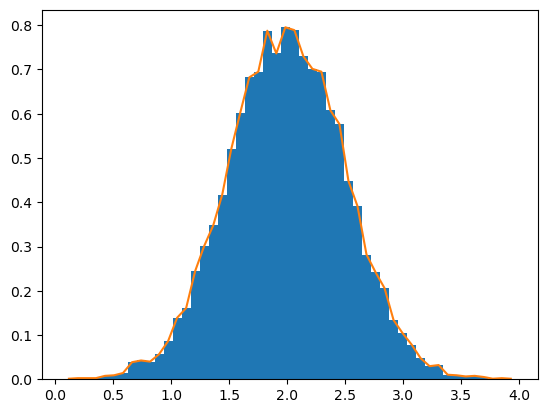

In [45]:
rg=np.random.default_rng(1)
import matplotlib.pyplot as plt
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu,sigma=2,0.5
v=rg.normal(mu,sigma,10000)
# Plot a normalized histogram with 50 bins 绘制具有 50 个 bin 的归一化直方图
plt.hist(v,bins=50,density=True)
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, density=True)  # NumPy version (no plot)
plt.plot(.5 * (bins[1:] + bins[:-1]), n) 